In [7]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr


In [9]:
img_array = cv2.imread("Test_Dataset/Close_Eyes/close1.jpeg", cv2.IMREAD_GRAYSCALE)

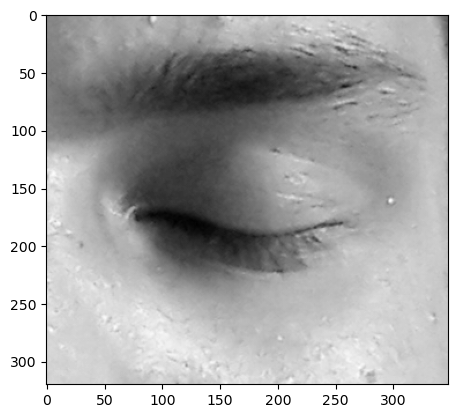

In [11]:
plt.imshow(img_array,cmap="gray")

In [13]:
img_array.shape

(320, 348)

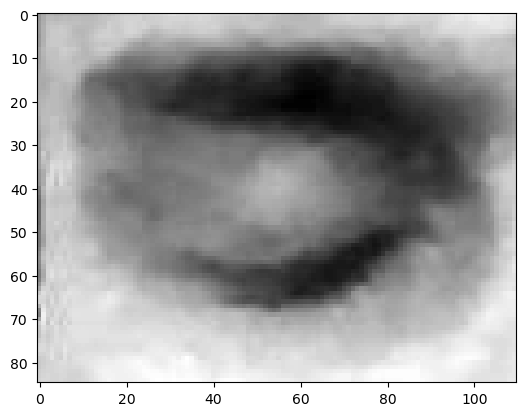

In [15]:
Datadirectory = "Test_Dataset/" ## training dataset

Classes = ["Close_Eyes", "Open_Eyes"] ## List of classes for category in Classes
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
        backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray") 
        plt.show()
        break
    break

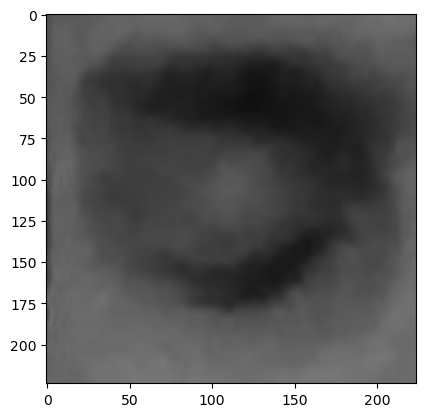

In [17]:
img_size = 224

new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [19]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size)) 
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [21]:
create_training_Data()

In [23]:
print(len(training_Data))

19


In [25]:
import random

random.shuffle(training_Data)

In [27]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [29]:
X.shape

(19, 224, 224, 3)

In [31]:
# normalize the data
X= X/255.0; ##we are normalize it

In [33]:
Y= np.array(y)

In [35]:
import pickle

pickle_out = open("X.pickle","wb") 
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

deep learning model for training - Training Learning

In [38]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
model = tf.keras.applications.mobilenet.MobileNet()

In [43]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Transfer learning

In [47]:
base_input = model.layers[1].input

In [49]:
base_output = model.layers[-4].output

In [51]:
flat_layer = layers.Flatten()(base_output)
dense_layer = layers.Dense(1)(flat_layer)  # One node for binary classification
final_output = layers.Activation('sigmoid')(dense_layer)

In [53]:
new_model = tf.keras.Model(inputs=base_input, outputs=final_output)

In [55]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

 settings for binary classification (open / closed)

In [58]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [60]:
new_model.fit(X,Y, epochs = 1 ,validation_split = 0.1)  ## training

1/1 ━━━━━━━━━━━━━━━━━━━━ 58s 58s/step - accuracy: 0.5882 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 2.8446


In [61]:
new_model.save('my_model.h5')

In [64]:
new_model = tf.keras.models.load_model('my_model.h5')

In [65]:
img_array = cv2.imread('Test_Dataset/Close_Eyes/close1.jpeg', cv2.IMREAD_GRAYSCALE) 
backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [68]:
 X_input= np.array(new_array).reshape(1, img_size, img_size, 3)


In [70]:
 X_input.shape

(1, 224, 224, 3)

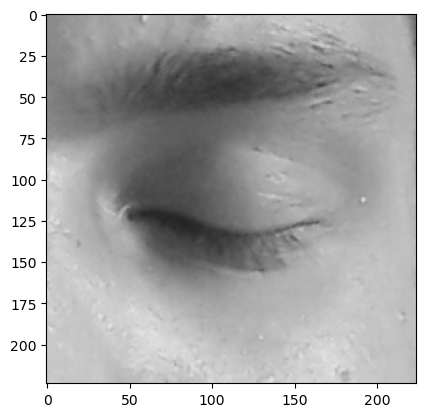

In [72]:
plt.imshow(new_array)

In [73]:
 X_input=X_input/255.0

In [76]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [77]:
prediction

array([[1.2956801e-05]], dtype=float32)

CHECK UNKNOWN

In [81]:
img = cv2.imread('5.jpEg')

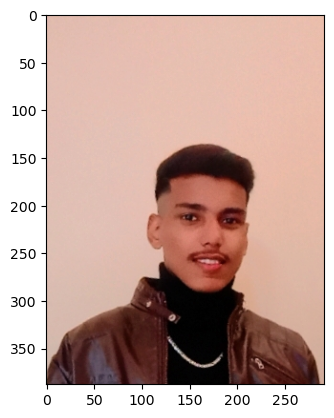

In [83]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [85]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [87]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [89]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [91]:
eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

In [93]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

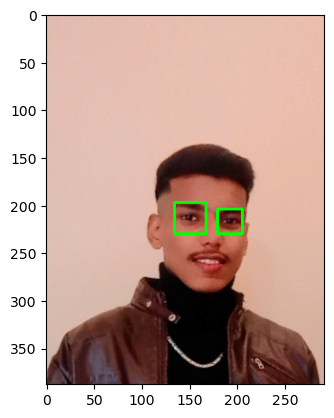

In [95]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [97]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml') 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #print(faceCascode.empty())

eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex + ew]

eyes are not detected


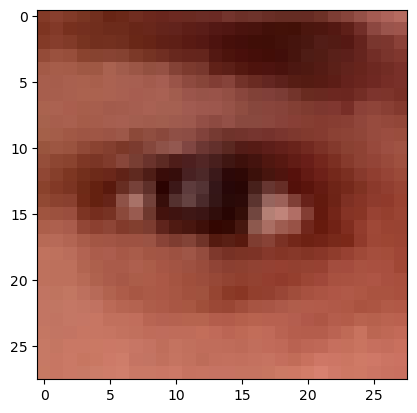

In [99]:
plt.imshow(cv2.cvtColor(eyes_roi , cv2.COLOR_BGR2RGB))

In [101]:
eyes_roi.shape

(28, 28, 3)

In [103]:
final_image = cv2.resize(eyes_roi, (224,224)) 
final_image = np.expand_dims(final_image,axis = 0) 
final_image = final_image/255.0

In [105]:
final_image.shape

(1, 224, 224, 3)

In [107]:
 new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[2.339971e-05]], dtype=float32)

Detect with camera

In [ ]:
import cv2 

path = "haarcascade_frontalface_default.xml"

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

#Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcan")

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    eyess = eye_cascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in eyes:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image =cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)  ##need fourth dimension
    final_images=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Closed Eyes"
    else:
        status = "Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw a rectangle around the faces 
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    #Use putText() method for

    #inserting text on video
    cv2.putText(frame,
                status,
                (50, 50),
                font, 3, 
                (0, 0, 255),
                2,
                cv2.LINE_4) 
    cv2.imshow("SAFETY.AI", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

If something is seen in red colour in above it's not error it's because of KeyboardInterupted to close camera and deyection

Detect Sound

In [112]:
import winsound
frequency = 2500
duration = 1000
import numpy as np
import cv2 
import gradio as gr

path = "haarcascade_frontalface_default.xml"

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

#Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcan")
counter = 0
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    eyess = eye_cascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in eyes:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image =cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)  ##need fourth dimension
    final_images=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Closed Eyes"
        cv2.putText(frame,
                status,
                (150, 150),
                font, 3, 
                (0, 255, 0),
                2,
                cv2.LINE_4)
        
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1),(0,0,0), -1)
        #ADD TEXT
        cv2.putText(frame, 'Active', (x1 + int (w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                status,
                (150, 150),
                font, 3, 
                (0, 0, 255),
                2,
                cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y +h),(0,0,0), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1),(0,0,0), -1)
            cv2.putText(frame, 'Sleep Alert !!', (x1 + int (w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
            winsound.Beep(frequency, duration)
            counter = 0
            
    cv2.imshow("SAFETY.AI", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
eyes are not detected
eyes are not detected
eyes are not detecte

KeyboardInterrupt: 

In [116]:
import gradio as gr

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import gradio as gr

# Load your pre-trained model
model = tf.keras.models.load_model('my_model.h5')

def detect_drowsiness(image):
    # Convert to RGB if the image is in BGR format
    if image.shape[-1] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Preprocess the image
    img = cv2.resize(image, (224, 224))  # Assuming the model expects 224x224 input
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict drowsiness
    prediction = model.predict(img)
    drowsy = prediction[0][0] > 0.5  # Assuming binary classification (0: Not drowsy, 1: Drowsy)

    return "Drowsy" if drowsy else "Not Drowsy"

# Step 3: Create Gradio Interfaces
upload_interface = gr.Interface(
    fn=detect_drowsiness,
    inputs=gr.Image(type="numpy", label="Upload an Image"),
    outputs=gr.Textbox(label="Drowsiness Detection")
)

webcam_interface = gr.Interface(
    fn=detect_drowsiness,
    inputs=gr.Image(type="numpy", label="Capture from Webcam"),
    outputs=gr.Textbox(label="Drowsiness Detection"),
    live=True
)

# Combine the interfaces into a single app
interface = gr.TabbedInterface([upload_interface, webcam_interface], ["Upload Image", "Webcam Capture"])

# Step 4: Launch the Interface
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://415f3d5b3cd9ef16fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
